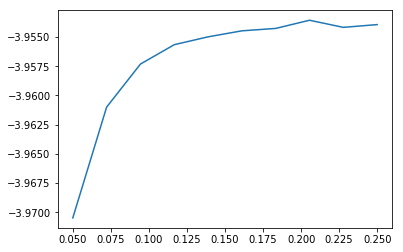

In [85]:
import numpy as np
from QMCP.functions import vmc, expectation_value
import matplotlib.pyplot as plt


def function(alpha, r1, r2, r):
    return(np.exp(-2*r1 - 2*r2 + r/(2*(1+alpha*r))))

def E_loc(alpha, r1_unit, r2_unit, r1_r2, r):
    return(-4 + np.linalg.norm((r1_unit - r2_unit) * r1_r2, axis = 0) * 1/(r*(1+alpha*r)**2) - 1/(r*(1+alpha*r)**3) - 1/(4*(1+alpha*r)**4) + 1/r)

def six_d_metropolis(alpha, N, n_walkers):
    
    x = np.zeros((2,N,n_walkers))
    xyz0 = np.zeros((dim,N,n_walkers))
    xyz1 = np.zeros((dim,N,n_walkers))
    #xyz1 = np.zeros((dim,n_walkers,N))
    xyz0[:,0,:] = np.random.rand(dim,n_walkers)
    xyz1[:,0,:] = np.random.rand(dim,n_walkers)
    x[0,0,:] = np.linalg.norm(xyz0[:,0,:], axis = 0)
    x[1,0,:] = np.linalg.norm(xyz1[:,0,:], axis = 0)
    trial_displacement = np.zeros((2,dim,n_walkers))
    
    for i in range(N):
        xyz_trial_0 = xyz0[:,i,:] + (0.2*(np.random.rand(dim,n_walkers)*4-2))
        xyz_trial_1 = xyz1[:,i,:] + (0.2*(np.random.rand(dim,n_walkers)*4-2))
        r0 = np.linalg.norm(xyz_trial_0, axis=0)
        r1 = np.linalg.norm(xyz_trial_1, axis=0)
        r_12 = np.linalg.norm(xyz_trial_0 - xyz_trial_1, axis = 0)
        ratio = function(alpha, r0, r1, r_12) / function(alpha, x[0,i-1,:], x[1,i-1,:], np.linalg.norm(xyz0[:,i,:]-xyz1[:,i,:], axis = 0))
        eta = np.random.uniform(0,1,size = n_walkers)
        x[0,i,:] = np.where(ratio >= 1, r0, (np.where(eta < ratio, r0, x[0,i-1,:]))) 
        x[1,i,:] = np.where(ratio >= 1, r1, (np.where(eta < ratio, r1, x[0,i-1,:]))) 
        xyz0[:,i,:] = np.where(ratio >= 1, xyz_trial_0,(np.where(eta < ratio, xyz_trial_0, xyz0[:,i-1,:])))
        xyz1[:,i,:] = np.where(ratio >= 1, xyz_trial_1,(np.where(eta < ratio, xyz_trial_1, xyz1[:,i-1,:])))
        
    r_0 = np.reshape(x[0,1000:,:], n_walkers*N - (n_walkers * 1000))
    r_1 = np.reshape(x[1,1000:,:], n_walkers*N - (n_walkers * 1000))
    xyz0 = np.reshape(xyz0[:,1000:,:], (3,n_walkers*N - (n_walkers * 1000)) )
    xyz1 = np.reshape(xyz1[:,1000:,:], (3,n_walkers*N - (n_walkers * 1000)) )
   
    r_0 = np.where(abs(r_0)<0.005, 0.1 , r_0)
    r_1 = np.where(abs(r_1)<0.005, 0.1 , r_1)
    return(r_0, r_1, xyz0, xyz1)

def calc_unit_vecors(r0, r1):
    r0_unit = r0 / np.linalg.norm(xyz_0, axis = 0)
    r1_unit = r1 / np.linalg.norm(xyz_1, axis = 0)
    return(r0_unit, r1_unit)
    
def calc_diff_vectors(r0, r1):
    r1_r2 = r0 - r1
    r12 = np.linalg.norm(r1_r2, axis = 0)
    return(r1_r2, r12)


alpha = np.linspace(0.05, 0.25, 10)
dim = 3
E_local = np.zeros(len(alpha))
E = np.zeros(len(alpha))

for i in range(len(alpha)):
    r_0, r_1, xyz_0, xyz_1 = six_d_metropolis(alpha[i], 5000 ,5)
    r0_unit, r1_unit = calc_unit_vecors(xyz_0, xyz_1)
    r1_r2, r12 = calc_diff_vectors(r_0, r_1)
    E_local = E_loc(alpha[i], r0_unit, r1_unit, r1_r2, r12)
    E[i] = expectation_value(E_local)

    
plt.figure()
plt.plot(alpha, E)


In [75]:
alpha = np.linspace(0.05, 0.25, 10)
dim = 3
E_local = np.zeros(len(alpha))
E = np.zeros(len(alpha))

for i in range(len(alpha)):
    r_0, r_1, xyz_0, xyz_1 = six_d_metropolis(alpha[i], 5000 ,5)
    r0_unit, r1_unit = calc_unit_vecors(xyz_0, xyz_1)
    r1_r2, r12 = calc_diff_vectors(r_0, r_1)
    E_local[i] = E_loc(alpha[i], r0_unit, r1_unit, r1_r2, r12)
    E[i] = expectation_value(E_local)
    
    

alpha = 0.1
dim = 3
E_local = np.zeros(len(alpha))


r_0, r_1, xyz_0, xyz_1 = six_d_metropolis(5000,5)
r0_unit, r1_unit = calc_unit_vecors(xyz_0, xyz_1)
r1_r2, r12 = calc_diff_vectors(xyz_0, xyz_1)
E_local = E_loc(alpha, r0_unit, r1_unit, r1_r2, r12)
E = expectation_value(E_local)




TypeError: six_d_metropolis() takes 2 positional arguments but 3 were given

In [83]:
print(E)

[-3.97051262 -3.96102858 -3.95726364 -3.95521085 -3.95498115 -3.95430837
 -3.95401657 -3.95378112 -3.95378352 -3.95325321]
